In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Simulates a single roll with a given set of outcomes and probabilities
def simulateRoll(outcomes, probabilities, samples=1):
    result = random.choices(outcomes, weights=probabilities, k=samples)
    
    return result[0] if samples == 1 else result

# Adds the result of each roll to an array and returns the array
def simulateGame(numRolls, outcomes, probabilities):
    results = simulateRoll(outcomes, probabilities, numRolls)
    return results

# Plot the averages as the game progresses
def plotAverages(results):
    averages = []
    for i in range(len(results)):
        averages.append(np.mean(results[:i+1]))
    plt.plot(averages)
    plt.show()

# Machine 1
**Probability of getting $10:** 40%

**Probability of getting $0:** 60%

Average:  4.122


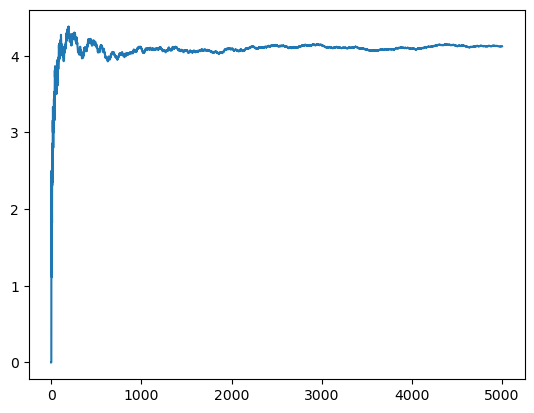

In [3]:
# Run the simulation and plot the averages
games = 5000
outcomes = [10, 0]
probabilities = [0.4, 0.6]

results = simulateGame(games, outcomes, probabilities)
print("Average: ", np.mean(results))

plotAverages(results)

# Machine 2
**Probability of getting $100:** 3%

**Probability of getting $0:** 93%

Average:  2.83


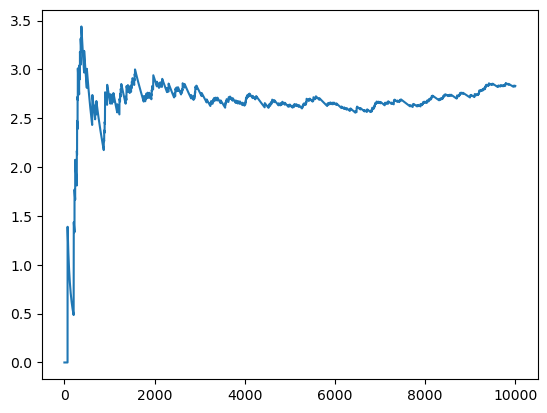

In [4]:
# Run the simulation and plot the averages
games = 10000
outcomes = [100, 0]
probabilities = [0.03, 0.97]

results = simulateGame(games, outcomes, probabilities)
print("Average: ", np.mean(results))

plotAverages(results)

## Calculating the expected value as we go

We want to update our expected value as we start getting results, not after a lot of tries

Since we don't know where where it should converge, we should notice when it stops "oscilating". We could look at the parts where the previous delta moves "a little".

In [11]:
# Calculate the expected value of the game
def calculateExpectedValue(currentIteration, previousExpectedValue, learningRate=0):
    if learningRate == 0:
        learningRate = 1/currentIteration

    expectedValue = previousExpectedValue + learningRate*(simulateRoll(outcomes, probabilities) - previousExpectedValue)

    return expectedValue

# Simulate the game and calculate the expected value
def simulateGameWithExpectedValue(outcomes, probabilities, learningRate=0):
    expectedValue = simulateRoll(outcomes, probabilities) # Our first expected value

    currentIteration = 1
    error = 1 # Just to enter the while loop
    initialIterations = 500 # This prevents the initial convergence from stopping from consecutive values
    expectedValueArray = []

    if learningRate == 0:
        for i in range(initialIterations):
            expectedValue = calculateExpectedValue(currentIteration, expectedValue)
            expectedValueArray.append(expectedValue)
            currentIteration += 1

        while abs(error) >= 0.001:
            currentIteration += 1
            previousExpectedValue = expectedValue
            expectedValue = calculateExpectedValue(currentIteration, expectedValue)
            expectedValueArray.append(expectedValue)
            error = abs(expectedValue - previousExpectedValue)

        print("\nConvergence iteration: ", currentIteration)
        print("Error: ", error)
        label = "Moving LR"
    
    else:
        for i in range(initialIterations):
            expectedValue = calculateExpectedValue(learningRate, expectedValue, learningRate)
            expectedValueArray.append(expectedValue)
            currentIteration += 1

        while currentIteration < 1000000 and error >= 0.001:
            currentIteration += 1
            previousExpectedValue = expectedValue
            expectedValue = calculateExpectedValue(learningRate, expectedValue, learningRate)
            expectedValueArray.append(expectedValue)
            error = abs(expectedValue - previousExpectedValue)

        print("\nConvergence iteration with learning rate ", learningRate, ": ", currentIteration)
        print("Error: ", error)
        print("Expected Value with learning rate ", learningRate, ": ", expectedValue)
        label = str(learningRate)

    expectedValueDict = {"Expected Value": expectedValue, "Expected Value Array": expectedValueArray, "Label": label}
    return expectedValueDict


# Machine 1
**Probability of getting $10:** 40%

**Probability of getting $0:** 60%


Convergence iteration:  4076
Error:  0.0009996676640762203
Expected Value:  4.0736457311089245

Convergence iteration with learning rate  0.1 :  1000000
Error:  0.3657810918750495
Expected Value with learning rate  0.1 :  3.2920298268754453

Convergence iteration with learning rate  0.01 :  1000000
Error:  0.03942610626866072
Expected Value with learning rate  0.01 :  3.90318452059742

Convergence iteration with learning rate  0.001 :  1000000
Error:  0.006006266924416526
Expected Value with learning rate  0.001 :  3.999739342508084

Convergence iteration with learning rate  0.002 :  1000000
Error:  0.007440219993258168
Expected Value with learning rate  0.002 :  3.712669776635871

Convergence iteration with learning rate  0.005 :  1000000
Error:  0.02958772332222548
Expected Value with learning rate  0.005 :  4.112043058877113

Convergence iteration with learning rate  0.007 :  1000000
Error:  0.028190365843614007
Expected Value with learning rate  0.007 :  3.9990047546726974

Conver

c:\Users\Prod\miniconda3\envs\rl-lab-dev\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


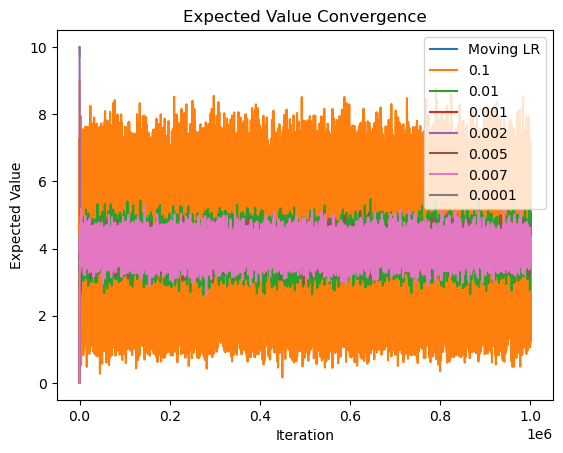

In [18]:
# Run the simulation and print the expected value
outcomes = [10, 0]
probabilities = [0.4, 0.6]
expectedValueArrays = []
labels = []

expectedValueDict = simulateGameWithExpectedValue(outcomes, probabilities)
expectedValueArrays.append(expectedValueDict["Expected Value Array"])
labels.append(expectedValueDict["Label"])
print("Expected Value: ", expectedValueDict["Expected Value"])

# Run the simulation with a fixed learning rate of 0.1, 0.01 and 0.001
for learningRate in [0.1, 0.01, 0.001, 0.002, 0.005, 0.007, 0.0001]:
    expectedValueDict = simulateGameWithExpectedValue(outcomes, probabilities, learningRate)
    expectedValueArrays.append(expectedValueDict["Expected Value Array"])
    labels.append(expectedValueDict["Label"])

# Plot the expected values
plt.xlabel("Iteration")
plt.ylabel("Expected Value")
plt.title("Expected Value Convergence")
for i in range(len(expectedValueArrays)):
    plt.plot(expectedValueArrays[i], label=labels[i])
plt.legend()
plt.show()

# Machine 2
**Probability of getting $100:** 3%

**Probability of getting $0:** 93%


Convergence iteration:  2551
Error:  0.0009996541148797888
Expected Value:  2.5491179929439456

Convergence iteration with learning rate  0.1 :  806
Error:  0.0009048367046441633
Expected Value with learning rate  0.1 :  0.008143530341797472

Convergence iteration with learning rate  0.01 :  1000000
Error:  0.04701077203445436
Expected Value with learning rate  0.01 :  4.654066431410957

Convergence iteration with learning rate  0.001 :  502
Error:  0.0008977095669405744
Expected Value with learning rate  0.001 :  0.8968118573736171

Convergence iteration with learning rate  0.002 :  1000000
Error:  0.006056269795675195
Expected Value with learning rate  0.002 :  3.022078628042018

Convergence iteration with learning rate  0.005 :  1000000
Error:  0.01797042876985744
Expected Value with learning rate  0.005 :  3.576115325201647

Convergence iteration with learning rate  0.007 :  1000000
Error:  0.022132123652497615
Expected Value with learning rate  0.007 :  3.139599826704333

Converg

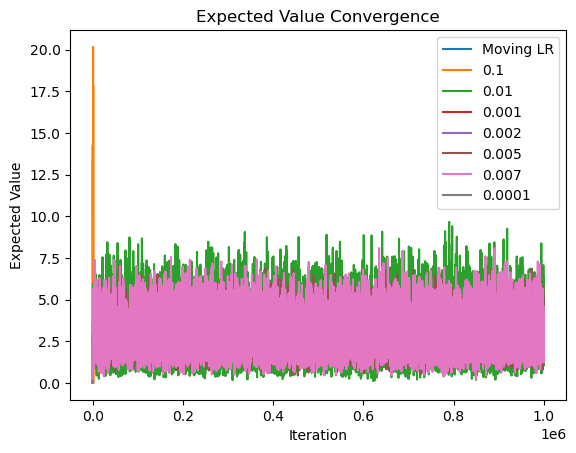

In [19]:
# Run the simulation and print the expected value
outcomes = [100, 0]
probabilities = [0.03, 0.97]
expectedValueArrays = []
labels = []

expectedValueDict = simulateGameWithExpectedValue(outcomes, probabilities)
expectedValueArrays.append(expectedValueDict["Expected Value Array"])
labels.append(expectedValueDict["Label"])
print("Expected Value: ", expectedValueDict["Expected Value"])

# Run the simulation with a fixed learning rate of 0.1, 0.01 and 0.001
for learningRate in [0.1, 0.01, 0.001, 0.002, 0.005, 0.007, 0.0001]:
    expectedValueDict = simulateGameWithExpectedValue(outcomes, probabilities, learningRate)
    expectedValueArrays.append(expectedValueDict["Expected Value Array"])
    labels.append(expectedValueDict["Label"])

# Plot the expected values
plt.xlabel("Iteration")
plt.ylabel("Expected Value")
plt.title("Expected Value Convergence")
for i in range(len(expectedValueArrays)):
    plt.plot(expectedValueArrays[i], label=labels[i])
plt.legend()
plt.show()